In [18]:
!pip install prophet

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly

In [20]:
df = pd.read_csv('/content/DailyDelhiClimateTrain.csv')
df.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [32]:
df.tail()

,date,meantemp,humidity,wind_speed,meanpressure,year,month
1457,2016-12-28,17.217391,68.043478,3.547826,1015.565217,2016,12
1458,2016-12-29,15.238095,87.857143,6.000000,1016.904762,2016,12
1459,2016-12-30,14.095238,89.666667,6.266667,1017.904762,2016,12
1460,2016-12-31,15.052632,87.000000,7.325000,1016.100000,2016,12
1461,2017-01-01,10.000000,100.000000,0.000000,1016.000000,2017,1


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          1462 non-null   object 
 1   meantemp      1462 non-null   float64
 2   humidity      1462 non-null   float64
 3   wind_speed    1462 non-null   float64
 4   meanpressure  1462 non-null   float64
dtypes: float64(4), object(1)
memory usage: 57.2+ KB


In [22]:
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df.head()

,date,meantemp,humidity,wind_speed,meanpressure,year,month
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667,2013,1
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000,2013,1
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667,2013,1
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667,2013,1
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000,2013,1


In [23]:
fig = px.line(df, x='date', y='meantemp', title='Mean Temperature in Delhi Over The Years')
fig.show()

In [24]:
fig = px.line(df, x='date', y='humidity', title='Humidity in Delhi Over The Years')
fig.show()

In [25]:
fig = px.line(df, x='date', y='wind_speed', title='Wind Speed in Delhi Over The Years')
fig.show()

In [26]:
fig = px.scatter(df, x='humidity', y='meantemp', size='meantemp', trendline='ols',
                 title='Relatinship Between Temperature and Humidity')
fig.show()

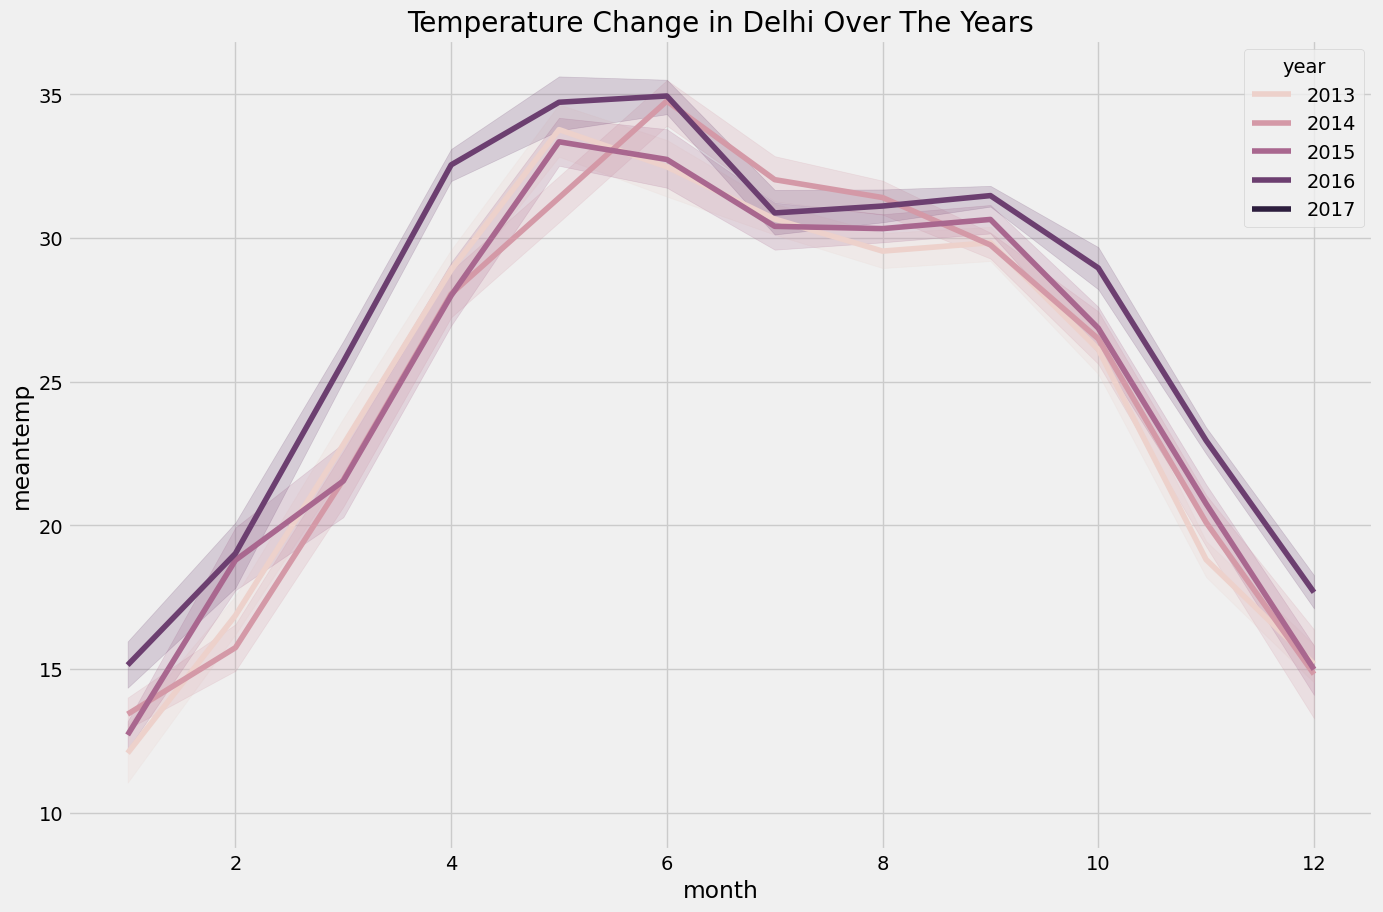

In [27]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(15, 10))
plt.title('Temperature Change in Delhi Over The Years')
sns.lineplot(data=df, x='month', y='meantemp', hue='year')
plt.show()

In [28]:
forecast_df = df.rename(columns = {
    'date': 'ds',
    'meantemp': 'y'
})
forecast_df

,ds,y,humidity,wind_speed,meanpressure,year,month
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667,2013,1
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000,2013,1
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667,2013,1
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667,2013,1
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000,2013,1
...,...,...,...,...,...,...,...
1457,2016-12-28,17.217391,68.043478,3.547826,1015.565217,2016,12
1458,2016-12-29,15.238095,87.857143,6.000000,1016.904762,2016,12
1459,2016-12-30,14.095238,89.666667,6.266667,1017.904762,2016,12
1460,2016-12-31,15.052632,87.000000,7.325000,1016.100000,2016,12


In [29]:
model = Prophet()
model.fit(forecast_df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkebzmqyb/6k88q1q4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkebzmqyb/725jxt6s.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=78549', 'data', 'file=/tmp/tmpkebzmqyb/6k88q1q4.json', 'init=/tmp/tmpkebzmqyb/725jxt6s.json', 'output', 'file=/tmp/tmpkebzmqyb/prophet_modelodqcnlho/prophet_model-20250723045105.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:51:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:51:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [31]:
forecasts = model.make_future_dataframe(periods=365)
forecasts

,ds
0,2013-01-01
1,2013-01-02
2,2013-01-03
3,2013-01-04
4,2013-01-05
...,...
1822,2017-12-28
1823,2017-12-29
1824,2017-12-30
1825,2017-12-31


In [33]:
predicitions = model.predict(forecasts)
predicitions

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2013-01-01,24.690074,9.405089,14.182833,24.690074,24.690074,-12.939149,-12.939149,-12.939149,0.034028,0.034028,0.034028,-12.973177,-12.973177,-12.973177,0.0,0.0,0.0,11.750925
1,2013-01-02,24.690237,9.371730,14.518555,24.690237,24.690237,-12.803787,-12.803787,-12.803787,0.146257,0.146257,0.146257,-12.950044,-12.950044,-12.950044,0.0,0.0,0.0,11.886450
2,2013-01-03,24.690400,9.202383,14.413114,24.690400,24.690400,-12.844518,-12.844518,-12.844518,0.067150,0.067150,0.067150,-12.911668,-12.911668,-12.911668,0.0,0.0,0.0,11.845882
3,2013-01-04,24.690563,9.229715,14.538467,24.690563,24.690563,-12.832462,-12.832462,-12.832462,0.027528,0.027528,0.027528,-12.859990,-12.859990,-12.859990,0.0,0.0,0.0,11.858100
4,2013-01-05,24.690725,9.362130,14.205337,24.690725,24.690725,-12.866125,-12.866125,-12.866125,-0.069127,-0.069127,-0.069127,-12.796998,-12.796998,-12.796998,0.0,0.0,0.0,11.824600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1822,2017-12-28,28.558458,13.152378,18.314268,28.038898,29.104231,-12.794668,-12.794668,-12.794668,0.067150,0.067150,0.067150,-12.861818,-12.861818,-12.861818,0.0,0.0,0.0,15.763790
1823,2017-12-29,28.561339,12.922698,18.443595,28.038862,29.110306,-12.894379,-12.894379,-12.894379,0.027528,0.027528,0.027528,-12.921906,-12.921906,-12.921906,0.0,0.0,0.0,15.666960
1824,2017-12-30,28.564219,12.890549,18.209909,28.039346,29.116381,-13.029319,-13.029319,-13.029319,-0.069127,-0.069127,-0.069127,-12.960192,-12.960192,-12.960192,0.0,0.0,0.0,15.534900
1825,2017-12-31,28.567099,12.742907,18.195343,28.038281,29.122314,-13.172926,-13.172926,-13.172926,-0.195063,-0.195063,-0.195063,-12.977863,-12.977863,-12.977863,0.0,0.0,0.0,15.394173


In [35]:
plot_plotly(model, predicitions)